<a target="_blank" href="https://colab.research.google.com/github/estocasticos-udem/clases-2023-2/blob/main/clase2_02-08-2023.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Para profundizar mas siga el notebook 
1. Siga el notebook: [Probability.ipynb](https://github.com/norvig/pytudes/blob/main/ipynb/Probability.ipynb) de Peter Norvig
2. En la siguiente pagina **Probability and Statistics with Python** ([link](https://prob-stat-python.github.io/textbook/Introduction.html)) se encuentra gran parte de lo que se usara en el curso.

In [104]:
!pip install matplotlib-venn

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib_venn import venn2

random.seed()

# Clase 2

* **Tema**: Probabilidad
* **Fecha**: 02/08/2023

## Experimento

Un experimento es una operación planificada que se realiza en condiciones controladas. 

### Ejemplo
Imagine que se lanzan dos monedas y observa si se obtienen 0, 1 o 2 caras. La siguiente tabla se obtuvo con datos reales obtenidos al lanzar dos monedas de 25 centavos 50 veces.

In [75]:
# 
from scipy.stats import bernoulli

output = {0: 'T', 1: 'H'}
num_monedas = 2
prob = 0.5
num_exp = 50
total_heads_experiment = [0,0,0]

# Ejecucion de los experimentos
for i in range(num_exp):
    exp_i = bernoulli.rvs(p=0.5, size=num_monedas)
    num_heads_i = sum(exp_i)
    total_heads_experiment[num_heads_i] += 1
    print(f"Exp {i + 1}: {output[exp_i[0]]}{output[exp_i[1]]} --- [{num_heads_i}]")

# Resulados experimento
freq_0H = total_heads_experiment[0]
freq_1H = total_heads_experiment[1]
freq_2H = total_heads_experiment[2]

# Despligue estadisticas
print()
print("Estadisticas del experimento")
print("Frecuencia (Numero de veces del evento ocurrido)")
print(f"- Numero de veces con cero caras a la salida [TT]: {freq_0H}")
print(f"- Numero de veces con una cara a la salida [HT, TH]: {freq_1H}")
print(f"- Numero de veces con una cara a la salida [HH]: {freq_2H}")


Exp 1: TT --- [0]
Exp 2: TT --- [0]
Exp 3: TH --- [1]
Exp 4: HT --- [1]
Exp 5: TT --- [0]
Exp 6: HT --- [1]
Exp 7: TT --- [0]
Exp 8: TT --- [0]
Exp 9: TH --- [1]
Exp 10: HH --- [2]
Exp 11: HT --- [1]
Exp 12: TT --- [0]
Exp 13: HT --- [1]
Exp 14: HT --- [1]
Exp 15: HT --- [1]
Exp 16: TT --- [0]
Exp 17: HT --- [1]
Exp 18: HH --- [2]
Exp 19: HT --- [1]
Exp 20: TT --- [0]
Exp 21: TT --- [0]
Exp 22: HT --- [1]
Exp 23: HH --- [2]
Exp 24: TH --- [1]
Exp 25: TH --- [1]
Exp 26: TH --- [1]
Exp 27: HH --- [2]
Exp 28: HT --- [1]
Exp 29: HT --- [1]
Exp 30: TH --- [1]
Exp 31: HT --- [1]
Exp 32: HT --- [1]
Exp 33: HH --- [2]
Exp 34: TT --- [0]
Exp 35: TT --- [0]
Exp 36: TT --- [0]
Exp 37: TT --- [0]
Exp 38: HH --- [2]
Exp 39: TT --- [0]
Exp 40: TH --- [1]
Exp 41: TH --- [1]
Exp 42: HT --- [1]
Exp 43: HH --- [2]
Exp 44: TH --- [1]
Exp 45: HH --- [2]
Exp 46: TT --- [0]
Exp 47: TT --- [0]
Exp 48: TH --- [1]
Exp 49: TH --- [1]
Exp 50: HT --- [1]

Estadisticas del experimento
Frecuencia (Numero de veces d

In [77]:
from scipy.stats import binom

num_monedas = 2
prob = 0.5
num_exp = 50
sample = binom.rvs(n = num_monedas, p = prob, size = num_exp)
# Salida de los experimentos
print(sample)

# Resulados experimento
freq_0H = np.count_nonzero(sample == 0)
freq_1H = np.count_nonzero(sample == 1)
freq_2H = np.count_nonzero(sample == 2)

# Despligue estadisticas
print()
print("Estadisticas del experimento")
print("Frecuencia (Numero de veces del evento ocurrido)")
print(f"- Numero de veces con cero caras a la salida [TT]: {freq_0H}")
print(f"- Numero de veces con una cara a la salida [HT, TH]: {freq_1H}")
print(f"- Numero de veces con una cara a la salida [HH]: {freq_2H}")

[1 1 2 1 1 2 2 1 1 2 1 2 1 1 0 1 2 2 1 1 1 1 2 2 1 1 1 1 1 2 1 1 2 2 1 1 0
 1 2 1 1 1 1 0 0 1 1 0 2 1]

Estadisticas del experimento
Frecuencia (Numero de veces del evento ocurrido)
- Numero de veces con cero caras a la salida [TT]: 5
- Numero de veces con una cara a la salida [HT, TH]: 31
- Numero de veces con una cara a la salida [HH]: 14


## Ley de los grandes numeros

El comportamiento del azar es impredecible a corto plazo, pero tiene un patrón regular y predecible a largo plazo.

> **Ley de los grandes numeros**<br> 
> La ley de los grandes números dice que si observamos más y más repeticiones de cualquier proceso aleatorio, la proporción de veces que ocurre un resultado específico se aproxima a un solo valor.


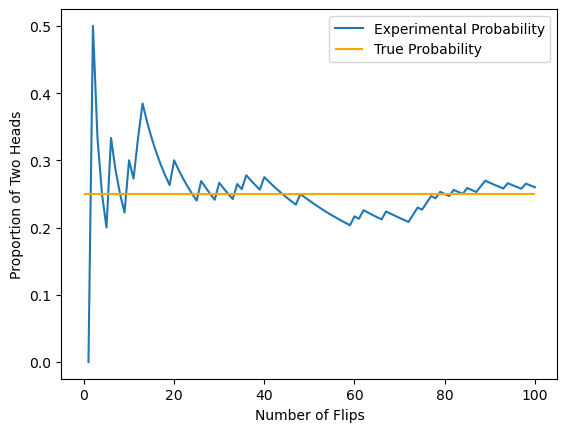

In [9]:

def coin_flip_experiment():
  # defining our two coins as lists
  coin1 = ['Heads', 'Tails']
  coin2 = ['Heads', 'Tails']
 
  # "flipping" both coins randomly
  coin1_result = np.random.choice(coin1)
  coin2_result = np.random.choice(coin2)
 
  # checking if both flips are heads
  if coin1_result == 'Heads' and coin2_result == 'Heads':
    return 1
  else:
    return 0
 
# how many times we run the experiment
num_trials = 100
prop = []
flips = []
# keep track of the number of times heads pops up twice
two_heads_counter = 0
 
# perform the experiment five times
for flip in range(num_trials):
  # if both coins are heads add 1 to the counter
  two_heads_counter += coin_flip_experiment()
  # keep track of the proportion of two heads at each flip 
  prop.append(two_heads_counter/(flip+1))
  # keep a list for number of flips
  flips.append(flip+1)
 
# plot all flips and proportion of two heads
plt.plot(flips, prop, label='Experimental Probability')
plt.xlabel('Number of Flips')
plt.ylabel('Proportion of Two Heads')

plt.hlines(0.25, 0, num_trials, colors='orange', label='True Probability')
plt.legend()
 
plt.show()

## Ejemplos de las diapositivas de la clase

In [48]:
# Definicion de probabilidad

from fractions import Fraction

def P(event, space): 
    "The probability of an event, given a sample space."
    return Fraction(cases(favorable(event, space)), 
                    cases(space))

favorable = set.intersection # Outcomes that are in the event and in the sample space
cases     = len              # The number of cases is the length, or size, of a set


**Ejemplo 1**

El espacio muestral S son los números enteros a partir de uno y menores de 20. Por otro lado, supongamos que el evento *A = los números pares* y el evento *B = los números mayores de 13*. Determinar:
1. $S$
2. $A$ 
3. $B$
4. $P(A)$
5. $P(B)$
6. $A \cap B$ 
7. $A \cup B$ 
8. $P(A \cap B)$ 
9. $P(A \cup B)$ 
10. $A'$
11. $P(A')$
12. $P(A) + P(A')$ 
13. $P(A|B)$
14. $P(B|A)$
15. ¿las probabilidades $P(A|B)$ y $P(B|A)$ son iguales ?

In [ ]:
# 1
S = set(range(1,21))
print("S = ", S ,sep = '')
# 2
A = set([n for n in S if n%2 == 0])
print("A = ", A ,sep = '')
# 3
B = set([n for n in S if n > 13])
print("B = ", B ,sep = '')
# 4
P_A = P(A,S)
print("P(A) = ", P_A ,sep = '')
# 5
P_B = P(B,S)
print("P(B) = ", P_B ,sep = '')
# 6
A_and_B = A.intersection(B)
print("A and B = ", A_and_B ,sep = '')
# 7
A_or_B = A.union(B)
print("A or B = ", A_or_B ,sep = '')
# 8
P_A_and_B = P(A_and_B,S)
print("P(A and B) = ", P_A_and_B ,sep = '')
# 9
P_A_or_B = P(A_or_B,S)
print("P(A or B) = ", P_A_or_B ,sep = '')
# 10
A_c = S.difference(A)
print("A' = ", A_c ,sep = '')
# 11
P_A_c = P(A_c,S)
print("P(A') = ", P_A_c ,sep = '')
# 12
print(f"P(A) + P(A') = {P_A} + {P_A_c} = {P_A + P_A_c}")
# 13
P_A_dado_B = Fraction(P_A_and_B,P_B)
print(f"P(A|B) = {P_A_dado_B}")
# 14
P_B_dado_A = Fraction(P_A_and_B,P_A)
print(f"P(B|A) = {P_B_dado_A}")
# 15
if P_A_dado_B == P_B_dado_A:
    print("P(A|B) == P(B|A)? --> Verdadero")
else:
    print("P(A|B) == P(B|A)? --> Falso")

S = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
A = {2, 4, 6, 8, 10, 12, 14, 16, 18, 20}
B = {14, 15, 16, 17, 18, 19, 20}
P(A) = 1/2
P(B) = 7/20
A and B = {16, 18, 20, 14}
A or B = {2, 4, 6, 8, 10, 12, 14, 15, 16, 17, 18, 19, 20}
P(A and B) = 1/5
P(A or B) = 13/20
A' = {1, 3, 5, 7, 9, 11, 13, 15, 17, 19}
P(A') = 1/2
P(A) + P(A') = 1/2 + 1/2 = 1
P(A|B) = 4/7
P(B|A) = 2/5
P(A|B) == P(B|A)? --> Falso


**Ejemplo 2**

La siguiente tabla describe la distribución de una muestra aleatoria S de 100 personas, organizada por sexo y por si son diestras o zurdas:

||Diestro|Zurdo|
|---|---|---|
|Hombre|43|9|
|Mujer|44|4|


Si denotamos los eventos *M = el sujeto es hombre*, *F = el sujeto es mujer*, *R = el sujeto es diestro*, *L = el sujeto es zurdo*. Calcule las siguientes probabilidades:
1. $P(M)$
2. $P(F)$
3. $P(R)$
4. $P(L)$
5. $P(M \cap R)$
6. $P(F \cap L)$
7. $P(M \cup F)$
8. $P(M \cup R)$
9. $P(F \cup L)$
10. $P(M')$
11. $P(R|M)$
12. $P(F|L)$
13. $P(L|F)$

In [1]:
tabla = [
          [43, 9],
          [44, 4]
        ]

# Totales
N_M = sum(tabla[0])
N_F = sum(tabla[1])
N_R = tabla[0][0] + tabla[1][0]
N_L = tabla[0][1] + tabla[1][1]
N = N_M + N_F

# 1
P_M = N_M/N
print(f"P(M) =  {P_M}")
# 2
P_F = N_F/N
print(f"P(F) =  {P_F}")
# 3
P_R = N_R/N
print(f"P(R) =  {P_R}")
# 4
P_L = N_L/N
print(f"P(L) =  {P_L}")
# 5
N_M_and_R = tabla[0][0]
P_M_and_R = N_M_and_R/N
print(f"P(M and R) =  {P_M_and_R}")
# 6
N_F_and_L = tabla[1][1]
P_F_and_L = N_F_and_L/N
print(f"P(F and L) =  {P_F_and_L}")
# 7
P_M_or_F = (N_M + N_F)/N
print(f"P(M or F) =  {P_M_or_F}")
# 8
P_M_or_R = (N_M + N_R - N_M_and_R)/N
print(f"P(M or R) =  {P_M_or_R}")
# 9
P_F_or_L = (N_F + N_L - N_F_and_L)/N
print(f"P(F or L) =  {P_F_or_L}")
# 10
P_M_c = (N - N_M)/N
print(f"P(M') =  {P_M_c}")
# 11
P_R_dado_M = (N_M_and_R)/N_M
print(f"P(R|M) =  {P_R_dado_M:.4}")
# 12
P_F_dado_L = (N_F_and_L)/N_L
print(f"P(F|L) =  {P_F_dado_L:.4}")
# 13
P_L_dado_F = (N_F_and_L)/N_F
print(f"P(L|F) =  {P_L_dado_F:.4}")

P(M) =  0.52
P(F) =  0.48
P(R) =  0.87
P(L) =  0.13
P(M and R) =  0.43
P(F and L) =  0.04
P(M or F) =  1.0
P(M or R) =  0.96
P(F or L) =  0.57
P(M') =  0.48
P(R|M) =  0.8269
P(F|L) =  0.3077
P(L|F) =  0.08333


## Actividades

**Ejercicio 1**: (Ejemplo 2 de las diapositivas de clase) El espacio muestral S son todos los pares ordenados de dos números enteros, el primero de uno a tres y el segundo de uno a cuatro (ejemplo: (1, 4)). Suponiendo que el evento *A = la suma es par* y el evento *B = el primer número es primo*.
1. $S$
2. $A$
3. $B$
4. $P(A)$
5. $P(B)$
6. $A \cap B$
7. $A \cup B$
8. $P(A \cap B)$
9. $P(A \cup B)$
10. $B'$ 
11. $P(B')$
12. $P(A) + P(A')$ 
13. $P(A|B)$  
14. $P(B|A)$ 
15. ¿las probabilidades $P(A|B)$ y $P(B|A)$ son iguales ?

## Referencias

1. https://realpython.com/python-sets/
2. https://www.datacamp.com/tutorial/sets-in-python
3. https://py3.codeskulptor.org/docs.html
4. https://www.markdownguide.org/basic-syntax/
5. https://openincolab.com/
6. https://www.codecademy.com/learn/paths/master-statistics-with-python/tracks/stats-probability/modules/stats-rules-of-probability/cheatsheet
7. https://bookdown.org/aquintela/EBE/las-leyes-de-los-grandes-numeros.html
8. https://realpython.com/python-statistics/
9. https://realpython.com/python-histograms/
10. https://www.datacamp.com/cheat-sheet/introduction-to-probability-rules-cheat-sheet
11. https://www.datacamp.com/tutorial/python-statistics-data-science
12. https://goodboychan.github.io/python/datacamp/statistics/2020/08/26/02-Random-Numbers-and-Probability.html
13. https://ethanweed.github.io/pythonbook/04.02-probability.html
14. https://prob-stat-python.github.io/textbook/Introduction.html
15. https://www.kaggle.com/code/hassanamin/probability-and-statistics-with-python
16. https://github.com/norvig/pytudes/blob/main/ipynb/Probability.ipynb
17. https://www.datacamp.com/tutorial/statistics-python-tutorial-probability-1
18. https://recursospython.com/guias-y-manuales/diagramas-de-venn-con-matplotlib/
19. https://github.com/konstantint/matplotlib-venn
20. https://github.com/tctianchi/pyvenn

